# Reikalingos bibliotekos

In [325]:

%matplotlib inline

# from pyproj import Proj, transform
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
from bokeh.tile_providers import get_provider, Vendors
from bokeh.models import ColumnDataSource
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from itertools import product
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from IPython.display import display, SVG
import seaborn as sns


# Bokeh init
output_notebook()
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

Loading BokehJS ...

# Singapore AirBnb
Import dataset, 
EDA to visualize data and observe structure, 
Decision tree, 
Predict target. 

aprasymas

# PANDAS AND SINGAPORE AIRBNB DATABASES


Šioje dalyje apibrėžiami duomenų tipai ir informacija bei grafikai iš turimų duomenų

In [326]:
data = pd.read_csv('data/listings.csv')

In [327]:
type(data)

pandas.core.frame.DataFrame

In [328]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [329]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

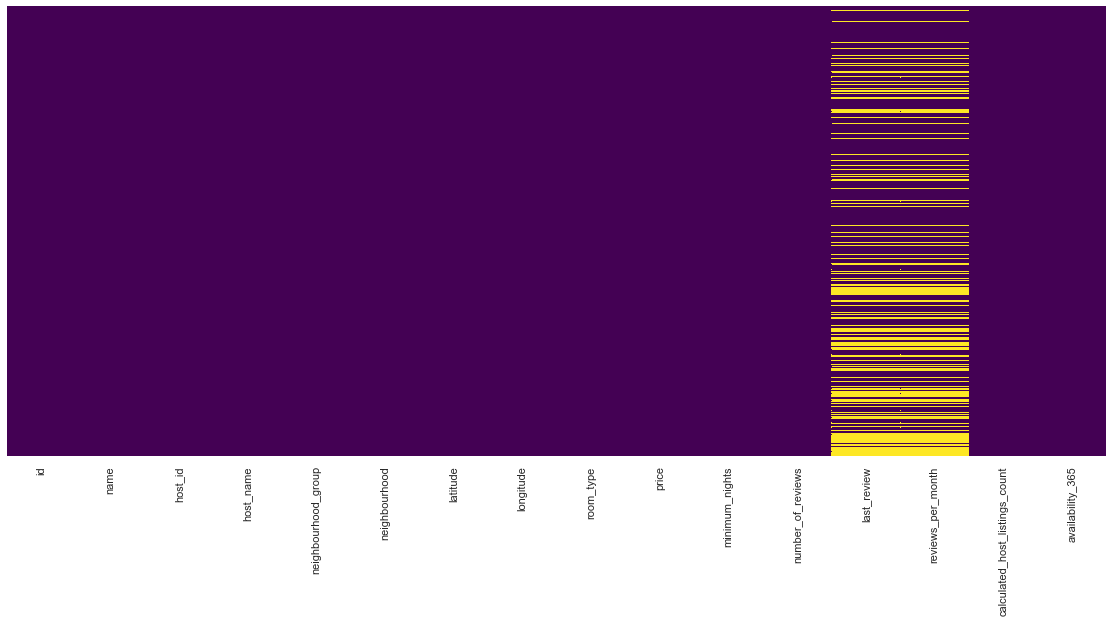

In [331]:
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Duomenų vizualizavimas

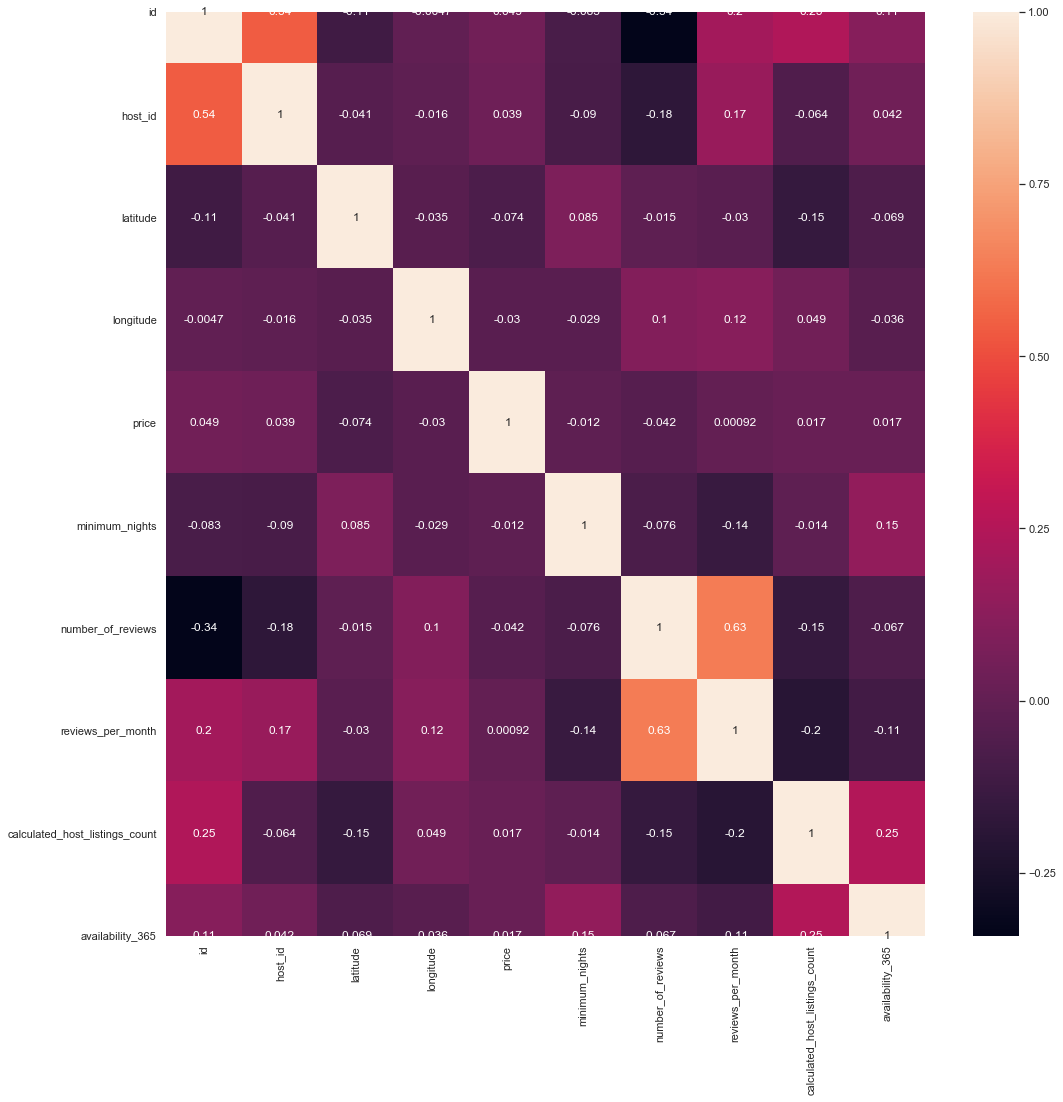

In [332]:
f,ax=plt.subplots(figsize=(17,17))
sns.heatmap(data.corr(),annot=True)#,linewidths=5,fmt='.1f',ax=ax)
plt.show()

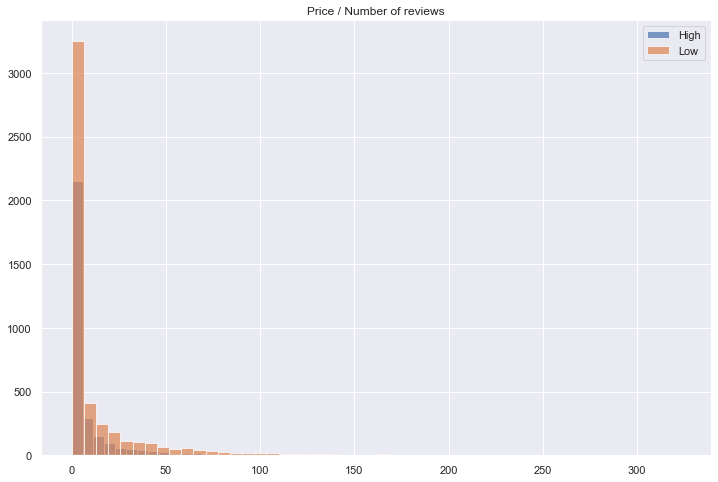

In [333]:
high_price = data[data['price'] >= 150]['number_of_reviews']
low_price = data[data['price'] < 150]['number_of_reviews']

fig = plt.figure(figsize=(12,8))
plt.title("Price / Number of reviews")
high_price.hist(alpha = 0.7, bins = 50, label = 'High')
low_price.hist(alpha = 0.7, bins = 50, label = 'Low')
plt.legend(loc = "upper right")

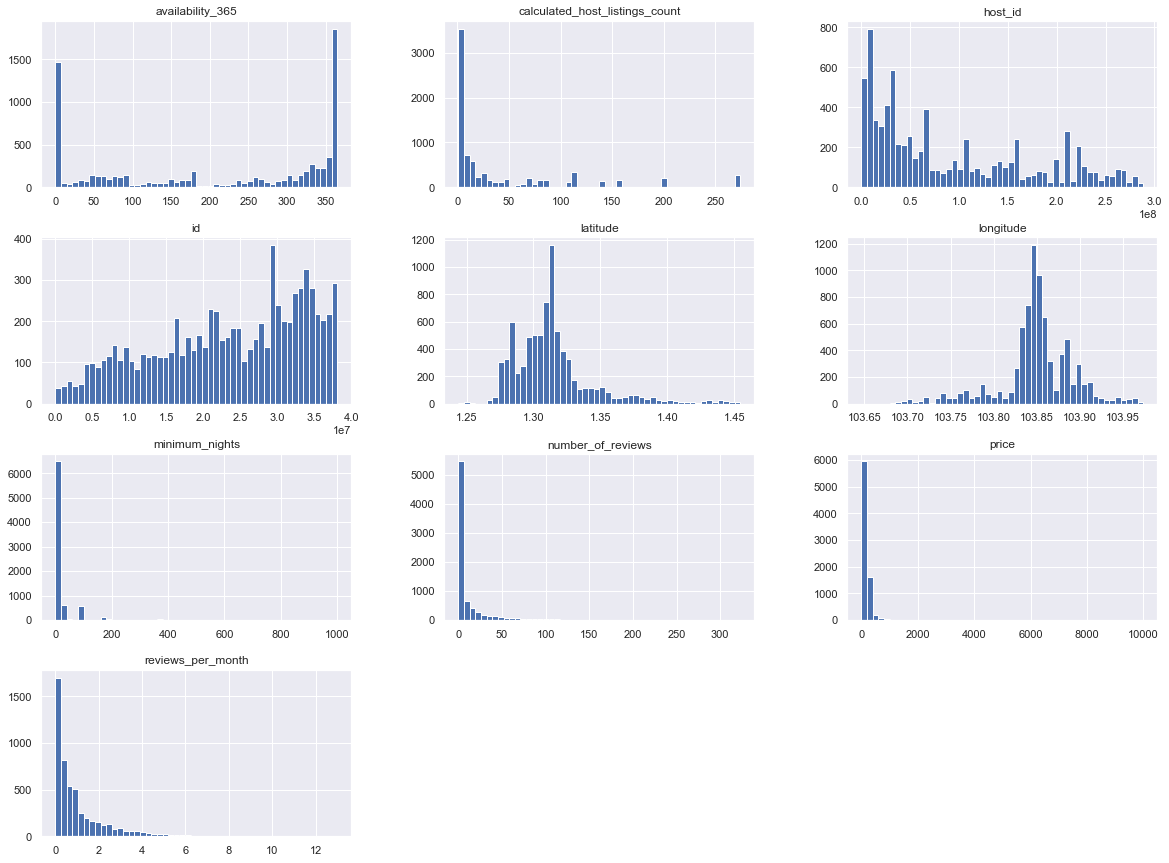

In [334]:
data.hist(bins =50, figsize =(20,15))
plt.show()

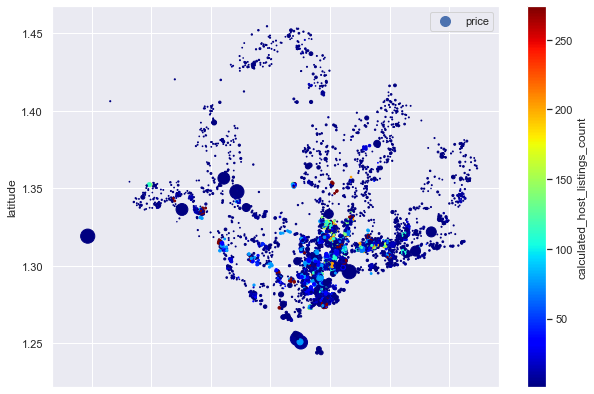

In [335]:
data.plot(kind="scatter", x="longitude", y="latitude",
    s=data['price']/50, label="price",
    c="calculated_host_listings_count", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=1, figsize=(10,7),
)
plt.legend()
plt.show()

info apie gautus rezultatus

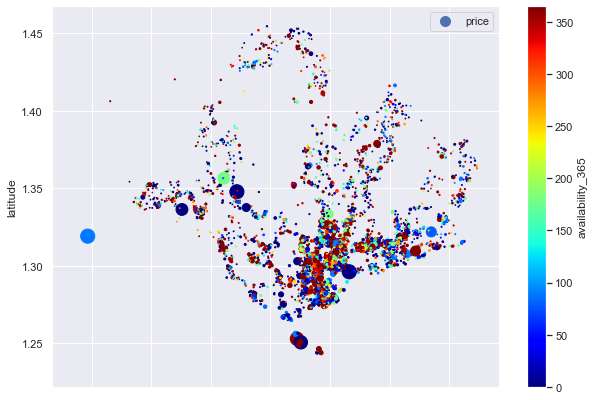

In [336]:
data.plot(kind="scatter", x="longitude", y="latitude",
    s=data['price']/50, label="price",
    c="availability_365", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=1, figsize=(10,7),
)
plt.legend()
plt.show()


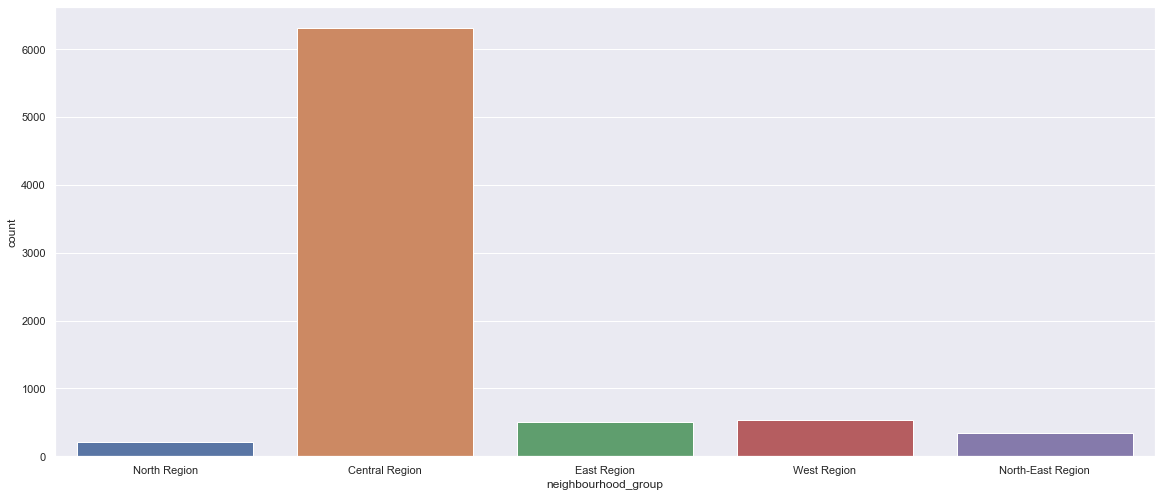

In [337]:
sns.countplot(data["neighbourhood_group"])

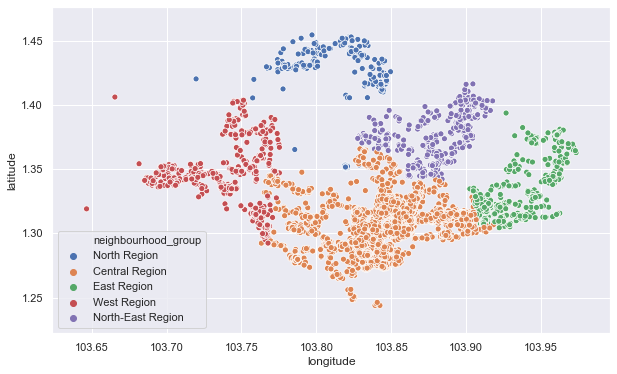

In [338]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

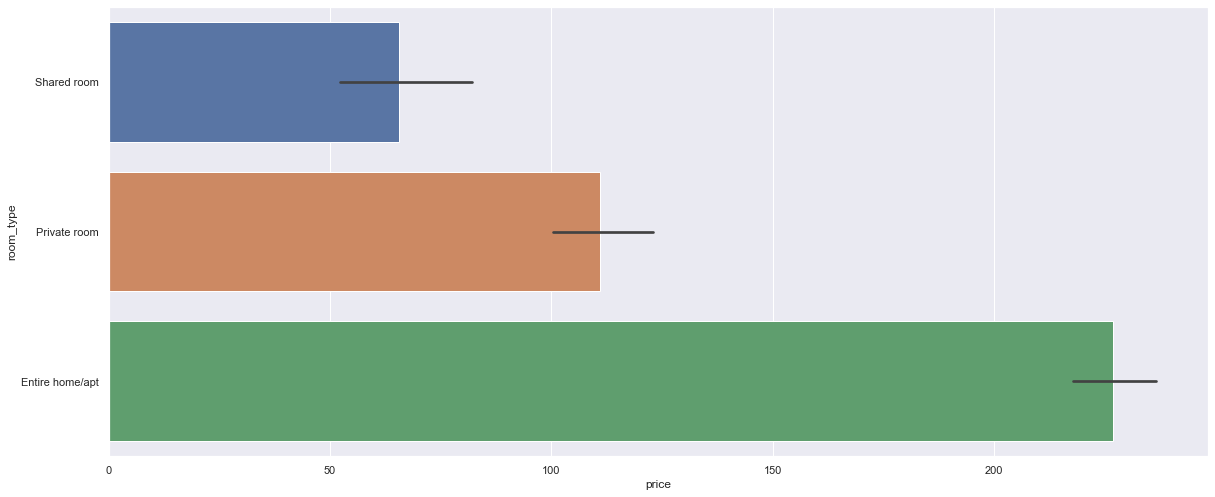

In [339]:
result = data.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='price', y="room_type", data = pd.read_csv('data/listings.csv'), order=result['room_type']) 

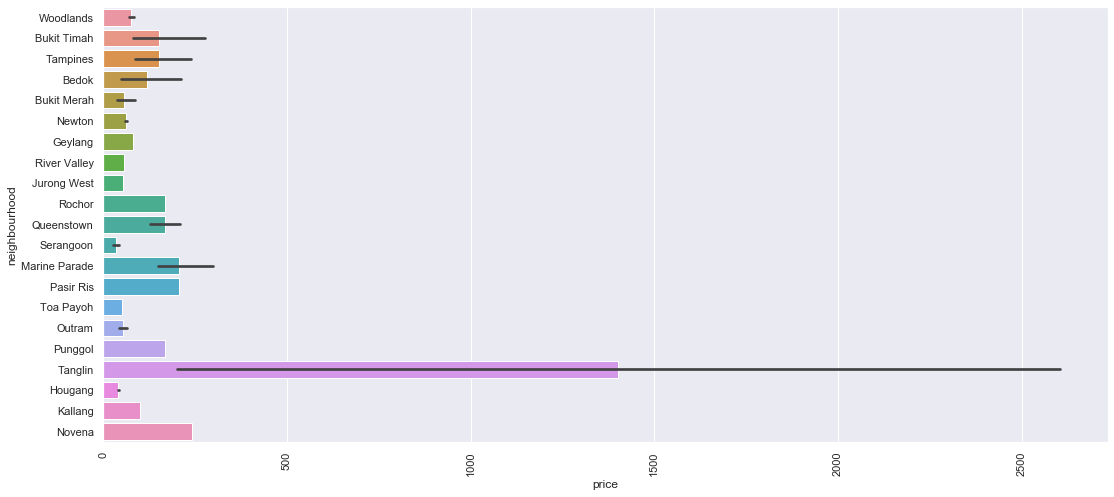

In [340]:
df=data
plt.figure(figsize=(18,8))
sns.barplot(x=df.price[:50], y=df.neighbourhood[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

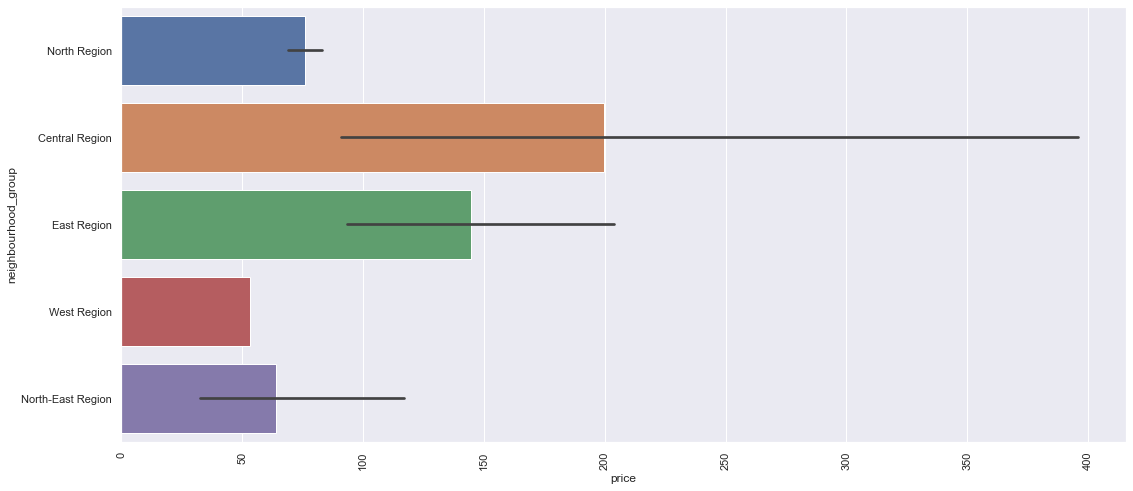

In [341]:
df=data
plt.figure(figsize=(18,8))
sns.barplot(x=df.price[:50], y=df.neighbourhood_group[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

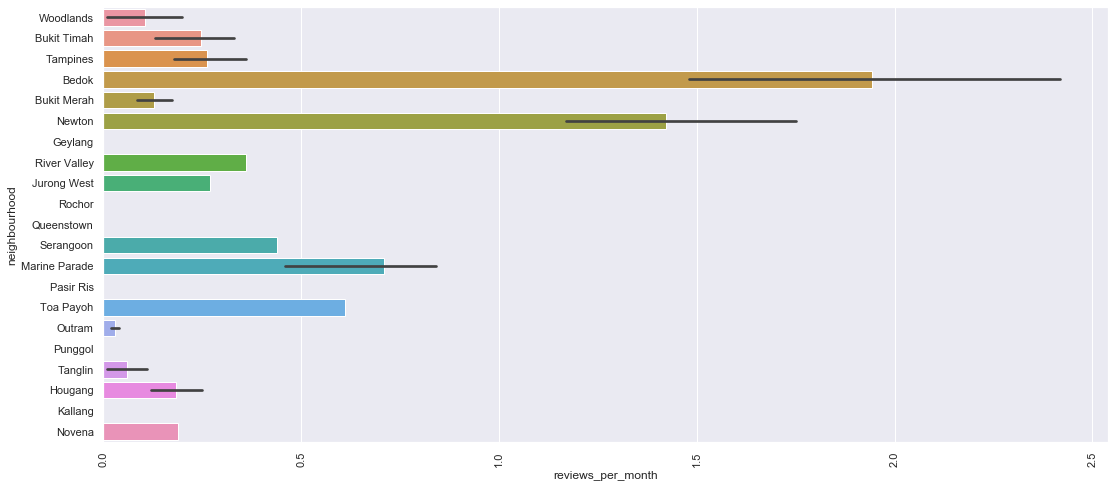

In [342]:
df=data
plt.figure(figsize=(18,8))
sns.barplot(x=df.reviews_per_month[:50], y=df.neighbourhood[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Train and Test split 
We will randomly split data into train and test sets to prevent overfitting.

In [344]:
np.random.seed(42)
mask = np.random.rand(data.shape[0]) <= 0.7

print('Train set shape {0}, test set shape {1}'.format(data[mask].shape, data[~mask].shape))

Train set shape (5609, 16), test set shape (2298, 16)


## Dropping cells

Šioje dalyje pašaliname tuos duomenis, kurie yra pertekliniai ir nedalyvauja tolimesniuose skaičiavimuose

In [345]:
drop_cols = ['last_review', 'reviews_per_month', 'host_name','name', 'latitude','longitude', 'id', 'host_id']

In [346]:
trun_df = df.drop(["id","name","host_name","last_review","host_id"],axis=1)
trun_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355


In [347]:
data = data.drop(drop_cols, axis =1)

In [348]:
from scipy import stats
outlier = (np.abs(stats.zscore(trun_df["price"]))<0.7)
outlier_ix = np.where(outlier==False)
clean_df = trun_df.drop(index=outlier_ix[0])

"neighbourhood_group", "neighbourhood" and "room_type" are categorical data types which need to be one-hot encoded

In [349]:
data.shape

(7907, 8)

Po nereikalingų stulpelių išmetimo likę duomenys

In [350]:
clean_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,0.01,2,365
1,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365
2,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,0.20,2,365
3,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,0.15,9,353
4,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,0.22,9,355


In [351]:
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

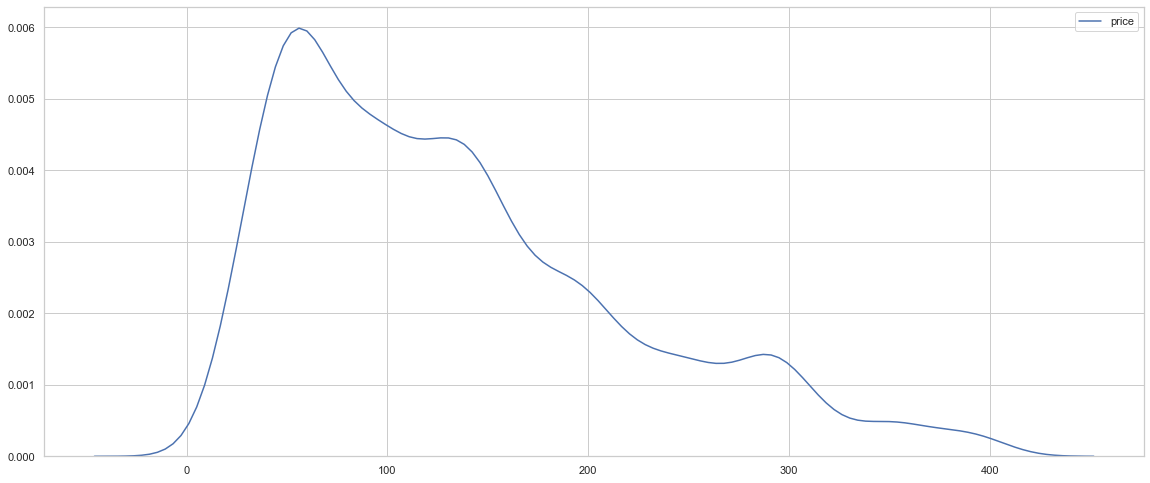

In [352]:
sns.kdeplot(clean_df["price"])

Impute missing values to review_per_month

In [353]:
clean_df["reviews_per_month"] = clean_df["reviews_per_month"].fillna(0)

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 8 columns):
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: int64(5), object(3)
memory usage: 494.3+ KB


In [355]:
clean_df[["neighbourhood_group","neighbourhood","room_type"]].nunique()

neighbourhood_group     5
neighbourhood          41
room_type               3
dtype: int64

In [356]:
clean_df["neighbourhood_group"].value_counts()

Central Region       6026
West Region           529
East Region           494
North-East Region     339
North Region          197
Name: neighbourhood_group, dtype: int64

In [357]:
clean_df["neighbourhood"].value_counts()

Kallang                    1003
Geylang                     965
Novena                      533
Rochor                      501
Outram                      467
Bukit Merah                 456
Downtown Core               405
Bedok                       363
River Valley                347
Queenstown                  263
Tanglin                     197
Marine Parade               169
Jurong West                 150
Singapore River             149
Bukit Timah                 128
Newton                      125
Jurong East                 116
Orchard                     110
Hougang                     105
Clementi                    101
Toa Payoh                   100
Pasir Ris                    70
Serangoon                    69
Woodlands                    66
Sengkang                     65
Bukit Batok                  63
Choa Chu Kang                62
Tampines                     61
Ang Mo Kio                   57
Museum                       52
Bishan                       52
Yishun  

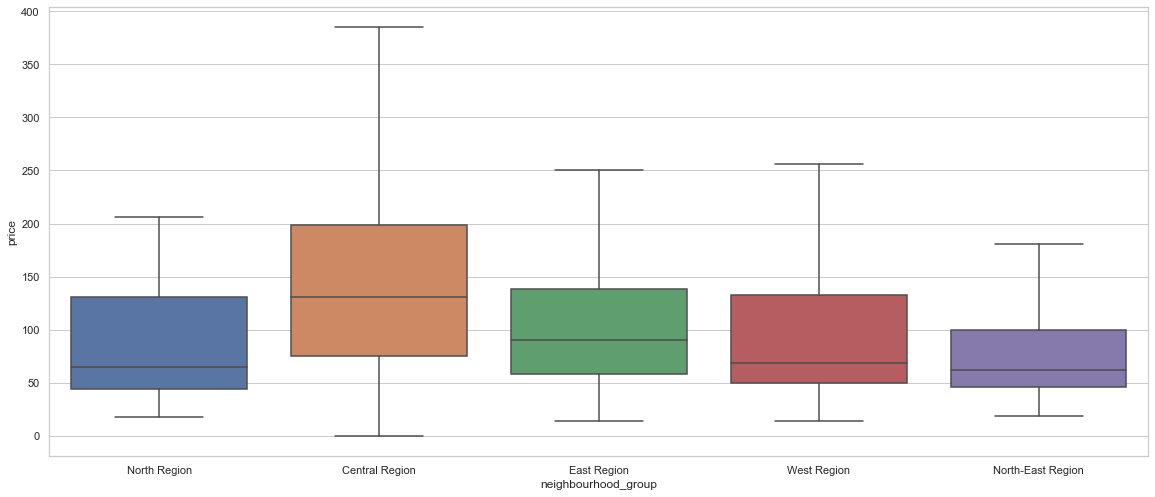

In [358]:
sns.boxplot(y="price",x="neighbourhood_group",showfliers=False, data=clean_df)

Kaina priklauso nuo rajono

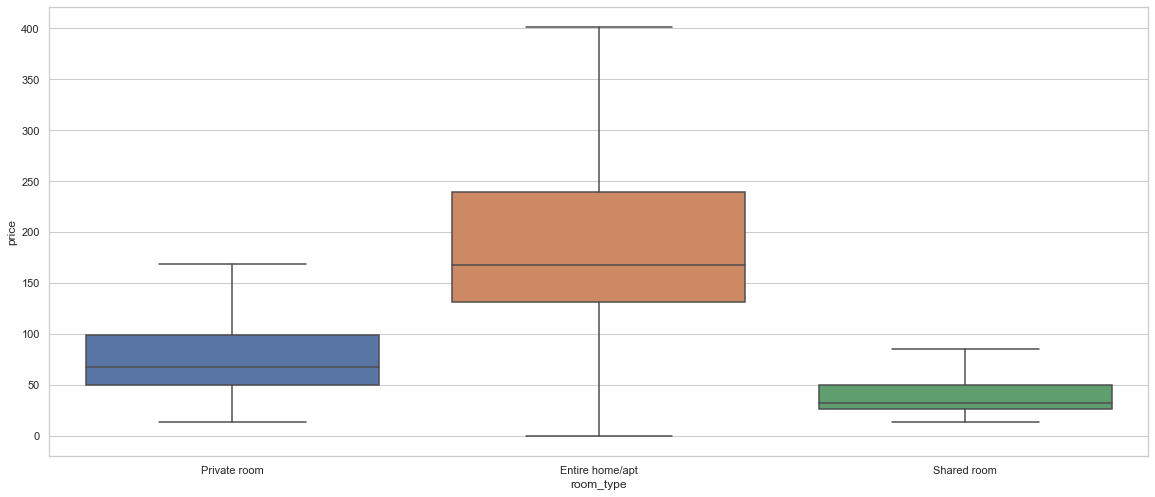

In [359]:
sns.boxplot(y="price",x="room_type",data=clean_df,showfliers=False)

Kaina priklauso nuo kambario tipo

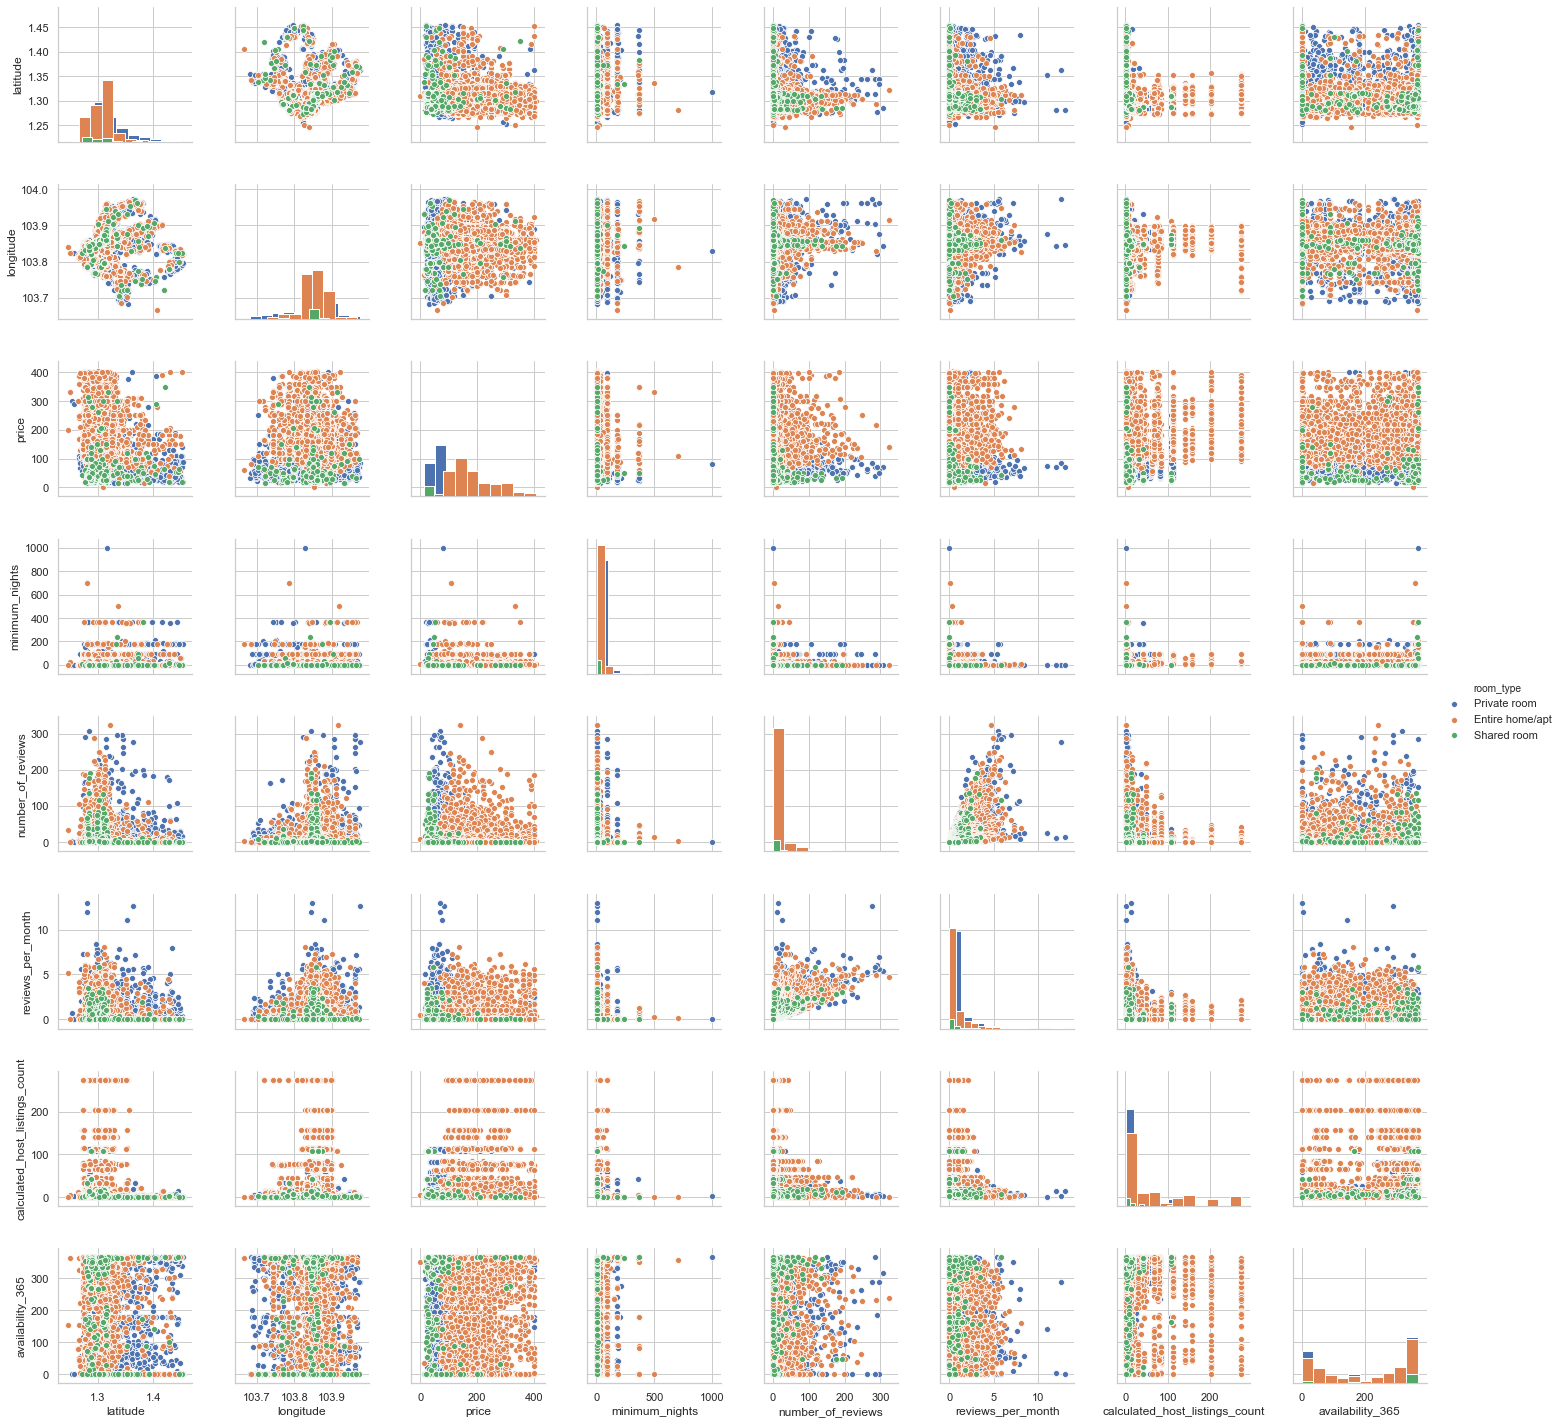

In [360]:
sns.pairplot(clean_df,hue="room_type", 
            kind="scatter",diag_kind="hist");

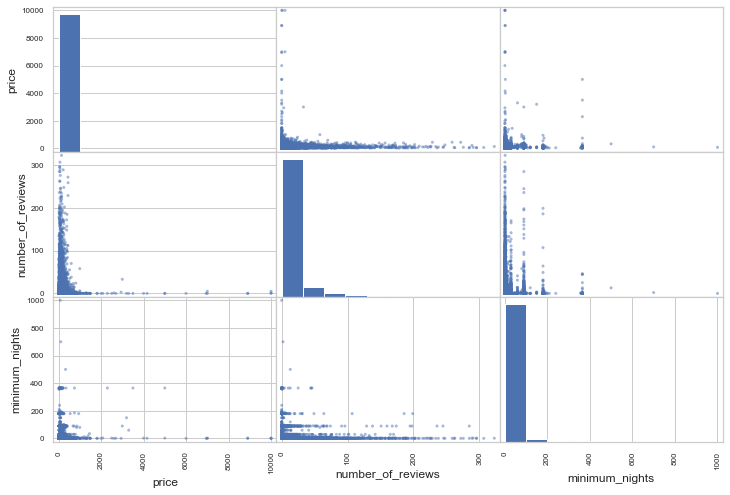

In [361]:
scatter_matrix(data[["price", "number_of_reviews", "minimum_nights"]],
              figsize = (12, 8))
plt.show()

In [362]:
data[mask]
data[~mask]


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
1,Central Region,Bukit Timah,Private room,81,90,18,1,365
2,North Region,Woodlands,Private room,69,6,20,2,365
7,East Region,Bedok,Private room,50,90,174,4,59
9,East Region,Bedok,Private room,42,90,236,4,147
11,Central Region,Bukit Merah,Private room,40,30,10,32,276
...,...,...,...,...,...,...,...,...
7895,Central Region,Queenstown,Entire home/apt,100,3,0,13,61
7896,Central Region,Geylang,Private room,65,3,0,10,365
7899,Central Region,River Valley,Private room,33,7,0,11,359
7903,Central Region,Tanglin,Entire home/apt,550,6,0,34,365


## Linear regression

In [302]:
lr = LinearRegression()
lr.fit(data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1),
       data[mask]['price'])
pred = lr.predict(data[~mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data[~mask]['price'])**2))))

RMSE = 387.91


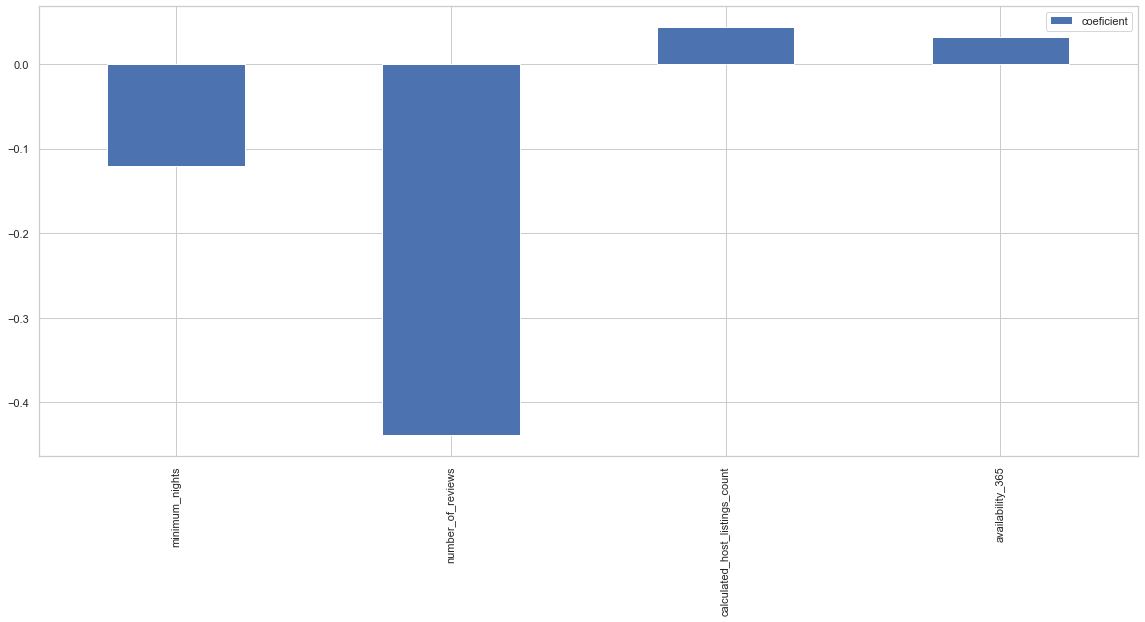

In [303]:
pd.DataFrame(lr.coef_, columns=['coeficient'],
    index=data[mask].drop(['price', 'neighbourhood_group', 'neighbourhood',
                       'room_type'], axis=1).columns,
             ).plot(kind='bar')

## One Hot Encoder

In [304]:
cat_encoder = OneHotEncoder()
data_cat = data[["neighbourhood_group"]]
data_cat_1hot = cat_encoder.fit_transform(data_cat)

In [305]:
data_cat_1hot.toarray()

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [306]:
data = pd.concat([data, pd.DataFrame(data_cat_1hot.toarray(),
                                    columns=cat_encoder.categories_)], axis =1)

In [307]:
cat_encoder = OneHotEncoder()
data_cat1 = data[["room_type"]]
data_cat_2hot = cat_encoder.fit_transform(data_cat1)


In [308]:
data_cat_2hot.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [309]:
data = pd.concat([data, pd.DataFrame(data_cat_2hot.toarray(),
                                    columns=cat_encoder.categories_)], axis =1)

In [310]:
data.neighbourhood

0          Woodlands
1        Bukit Timah
2          Woodlands
3           Tampines
4           Tampines
            ...     
7902      Queenstown
7903         Tanglin
7904         Kallang
7905    River Valley
7906    River Valley
Name: neighbourhood, Length: 7907, dtype: object

In [311]:
data


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,"(Central Region,)","(East Region,)","(North Region,)","(North-East Region,)","(West Region,)","(Entire home/apt,)","(Private room,)","(Shared room,)"
0,North Region,Woodlands,Private room,83,180,1,2,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Central Region,Bukit Timah,Private room,81,90,18,1,365,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,North Region,Woodlands,Private room,69,6,20,2,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,East Region,Tampines,Private room,206,1,14,9,353,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,East Region,Tampines,Private room,94,1,22,9,355,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,Central Region,Queenstown,Entire home/apt,100,3,0,31,61,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7903,Central Region,Tanglin,Entire home/apt,550,6,0,34,365,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7904,Central Region,Kallang,Private room,58,30,0,3,173,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7905,Central Region,River Valley,Private room,56,14,0,2,30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [312]:
drop_cols1 = ['neighbourhood', 'neighbourhood_group','room_type']

In [313]:
data = data.drop(drop_cols1, axis =1)

In [314]:
standard = StandardScaler().fit(data)
data_scaled = standard.transform(data)

In [315]:
print(data_scaled.mean(axis = 0))

[ 4.31339969e-17 -1.43779990e-17  0.00000000e+00  5.75119958e-17
 -4.31339969e-17  0.00000000e+00  3.59449974e-17  3.59449974e-17
  2.15669984e-17 -7.18899948e-18  1.43779990e-17 -5.75119958e-17
  2.87559979e-17]


In [316]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

In [317]:
data_scaled

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,"(Central Region,)","(East Region,)","(North Region,)","(North-East Region,)","(West Region,)","(Entire home/apt,)","(Private room,)","(Shared room,)"
0,-0.253797,3.860356,-0.397477,-0.592769,1.069556,-1.986973,-0.262027,6.144901,-0.213919,-0.270739,-1.046217,1.157004,-0.229003
1,-0.259676,1.722181,0.174801,-0.608122,1.069556,0.503278,-0.262027,-0.162737,-0.213919,-0.270739,-1.046217,1.157004,-0.229003
2,-0.294953,-0.273450,0.242128,-0.592769,1.069556,-1.986973,-0.262027,6.144901,-0.213919,-0.270739,-1.046217,1.157004,-0.229003
3,0.107791,-0.392238,0.040147,-0.485293,0.987427,-1.986973,3.816407,-0.162737,-0.213919,-0.270739,-1.046217,1.157004,-0.229003
4,-0.221459,-0.392238,0.309454,-0.485293,1.001115,-1.986973,3.816407,-0.162737,-0.213919,-0.270739,-1.046217,1.157004,-0.229003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,-0.203821,-0.344723,-0.431140,-0.147513,-1.011057,0.503278,-0.262027,-0.162737,-0.213919,-0.270739,0.955825,-0.864302,-0.229003
7903,1.119062,-0.273450,-0.431140,-0.101452,1.069556,0.503278,-0.262027,-0.162737,-0.213919,-0.270739,0.955825,-0.864302,-0.229003
7904,-0.327290,0.296730,-0.431140,-0.577415,-0.244515,0.503278,-0.262027,-0.162737,-0.213919,-0.270739,-1.046217,1.157004,-0.229003
7905,-0.333170,-0.083390,-0.431140,-0.592769,-1.223225,0.503278,-0.262027,-0.162737,-0.213919,-0.270739,-1.046217,1.157004,-0.229003


In [318]:
lr = LinearRegression()
lr.fit(data_scaled[mask].drop(['price'] , axis = 1),
       data_scaled[mask]['price'])
pred = lr.predict(data_scaled[~mask].drop(['price'], axis = 1))
print('RMSE = {0:.02f}'.format(
np.sqrt(np.mean((pred - data_scaled[~mask]['price'])**2))))

RMSE = 1.12


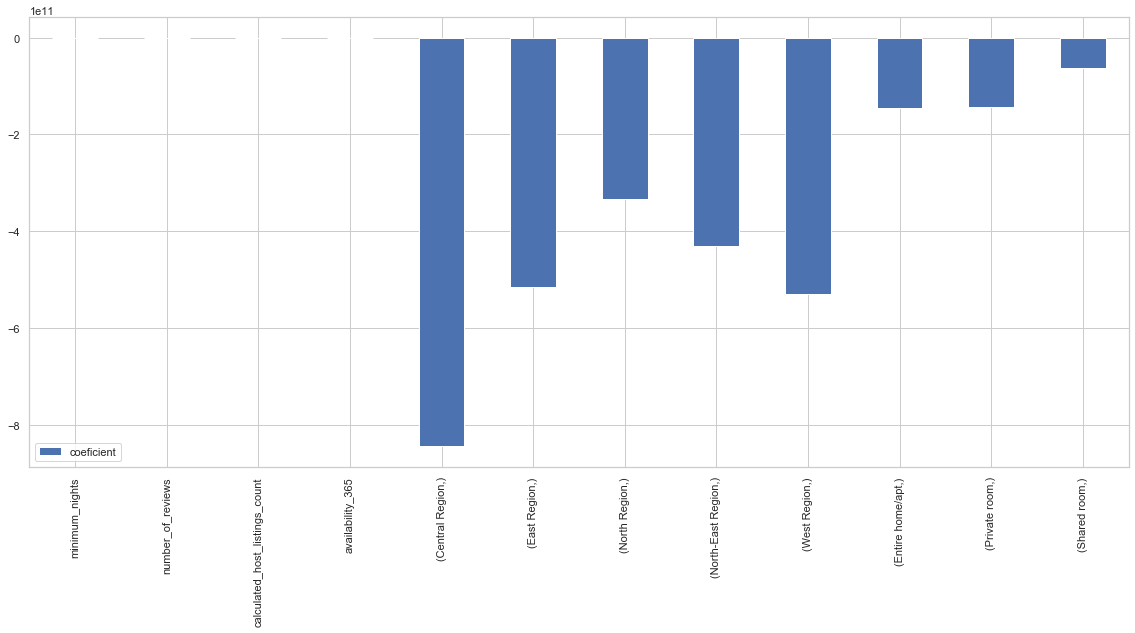

In [319]:
pd.DataFrame(lr.coef_, columns = ['coeficient'],
            index = data_scaled[mask].drop(['price'], axis = 1).columns,
            ).plot(kind='bar')

## Random Forest Regression

In [320]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_scaled[mask].drop(['price'], axis=1),
       data_scaled[mask]['price'])
pred1 = rf.predict(data_scaled[~mask].drop(['price'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data_scaled[~mask]['price'])**2))))

RMSE = 1.12


In [321]:
importances = list(zip(rf.feature_importances_, data_scaled.columns))
print (importances)

[(0.21462212203584372, 'price'), (0.1960034108978853, 'minimum_nights'), (0.1702088050819872, 'number_of_reviews'), (0.24658225891883606, 'calculated_host_listings_count'), (0.03726395450844782, 'availability_365'), (0.028353016740005167, ('Central Region',)), (0.008301231754208447, ('East Region',)), (0.00685446159503464, ('North Region',)), (0.02245498060638846, ('North-East Region',)), (0.05009785492142366, ('West Region',)), (0.012276212778549012, ('Entire home/apt',)), (0.006981690161390338, ('Private room',))]


In [322]:
corr_matrix = data_scaled.corr()
corr_matrix['price'].sort_values(ascending = False)

price                             1.000000
(Entire home/apt,)                0.177356
(Central Region,)                 0.042620
availability_365                  0.017451
calculated_host_listings_count    0.016555
(West Region,)                    0.005286
minimum_nights                   -0.012214
(East Region,)                   -0.020666
(North Region,)                  -0.028012
number_of_reviews                -0.042013
(North-East Region,)             -0.043703
(Shared room,)                   -0.069783
(Private room,)                  -0.148370
Name: price, dtype: float64

## Generalized linear models
Instead of using simple Linear regression defined by

$$\min_w ||Xw - y||^2_2$$
we will punish model for using large weights by adding additional term

$$\min_w \frac{1}{2 n_{samples}} ||Xw - y||^2_2 + \alpha ||w||_1.$$